In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_excel("NashikOnion2017-21.xlsx")
df.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival
0,Maharashtra,Nashik,Chandvad,Red,Vegetables,1300,1800,3218,2975,2017-12-30
1,Maharashtra,Nashik,Chandvad,Red,Vegetables,1505,1200,3025,2850,2017-12-29
2,Maharashtra,Nashik,Chandvad,Red,Vegetables,1200,1700,2976,2800,2017-12-28
3,Maharashtra,Nashik,Chandvad,Red,Vegetables,1912,1500,3000,2850,2017-12-27
4,Maharashtra,Nashik,Chandvad,Red,Vegetables,800,1300,2750,2490,2017-12-22


In [6]:
print(df.describe(include=[object]))

         state_name district_name market_center_name Variety  group_name
count         20087         20087              20087   20087       20087
unique            1             1                 20       4           1
top     Maharashtra        Nashik         Pimpalgaon   Other  Vegetables
freq          20087         20087               1704   13541       20087


In [7]:
##Finding Categorical Features in Dataset 
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 5
Categorical Features:  ['state_name', 'district_name', 'market_center_name', 'Variety', 'group_name']


In [8]:
##Numerical Features in Dataset
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 5
Numerical Features:  ['Arrival', 'MIN', 'MAX', 'MODAL', 'date_arrival']


In [9]:
#QQ plot To check Normality 

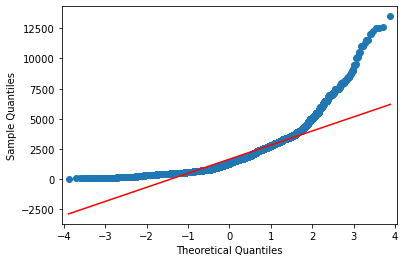

In [10]:
import statsmodels.api as smi
import pylab
smi.qqplot(df['MODAL'],line= 'r')
pylab.show()

From the above plot we can conclude that most of the data points are away from the line. Therefore given data is non-normal.

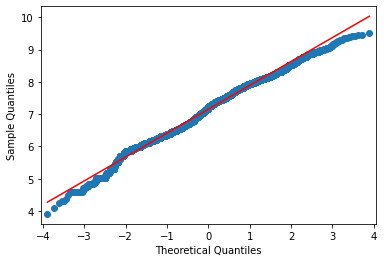

In [12]:
smi.qqplot(np.log(df.MODAL),line= 'r')
pylab.show()

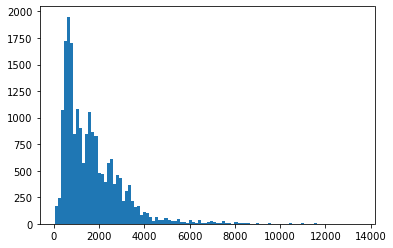

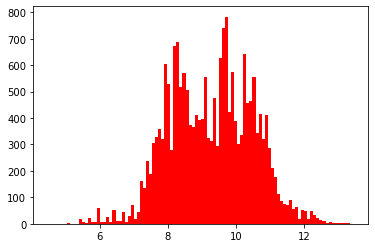

In [14]:
#BOX-COX transformation
from scipy import stats

   
# plot a 100 bin histogram of the "MODAL" column
plt.hist(df.MODAL, bins=100)
plt.show()
plt.clf()

transform = np.asarray(df.MODAL.values)

# transform values and store as "dft"
dft = stats.boxcox(transform)[0]

# plot the transformed data
plt.hist(dft, bins=100, color='red',)
plt.show()

Initially modal price shows positively skewed distribution. By using transformation we get symmetric distribution.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


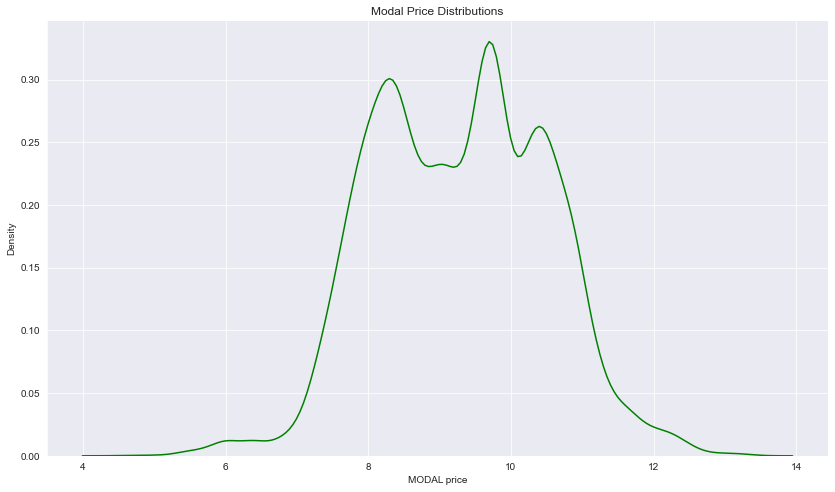

In [15]:
# Modal Price Distribution
plt.figure(figsize=(14, 8))
sns.set_style('darkgrid')
sns.distplot(a=np.log(df.MODAL), bins=80, color='green', hist=False, label='MODAL PRICE')
plt.title('Modal Price Distributions')
plt.xlabel('MODAL price')
sns.despine()

 By using transformation we get symmetric distribution.

In [31]:
#Feature Engineering of Date column to decrease high cardinality:
df['date_arrival'] = pd.to_datetime(df['date_arrival'])
df['year'] = df['date_arrival'].dt.year
df['month'] = df['date_arrival'].dt.month
df['day'] = df['date_arrival'].dt.day
df['week'] = df['date_arrival'].dt.week

<ipython-input-31-d20cbcf4f0fa>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date_arrival'].dt.week


In [32]:
#Drop Date column:
df.drop('date_arrival', axis = 1, inplace = True)
df.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,year,month,day,week
0,Maharashtra,Nashik,Chandvad,Red,Vegetables,1300,1800,3218,2975,2017,12,30,52
1,Maharashtra,Nashik,Chandvad,Red,Vegetables,1505,1200,3025,2850,2017,12,29,52
2,Maharashtra,Nashik,Chandvad,Red,Vegetables,1200,1700,2976,2800,2017,12,28,52
3,Maharashtra,Nashik,Chandvad,Red,Vegetables,1912,1500,3000,2850,2017,12,27,52
4,Maharashtra,Nashik,Chandvad,Red,Vegetables,800,1300,2750,2490,2017,12,22,51


In [34]:
df.corr()

,Arrival,MIN,MAX,MODAL,year,month,day,week
Arrival,1.000000,-0.201482,-0.173767,-0.186935,0.009526,-0.207179,-0.001538,-0.208688
MIN,-0.201482,1.000000,0.718071,0.762468,0.126071,0.264732,-0.006504,0.263696
MAX,-0.173767,0.718071,1.000000,0.971723,0.209256,0.406384,-0.009996,0.400057
MODAL,-0.186935,0.762468,0.971723,1.000000,0.201156,0.389798,-0.005989,0.384172
year,0.009526,0.126071,0.209256,0.201156,1.000000,0.010712,0.001624,0.019473
month,-0.207179,0.264732,0.406384,0.389798,0.010712,1.000000,0.049093,0.974410
day,-0.001538,-0.006504,-0.009996,-0.005989,0.001624,0.049093,1.000000,0.103107
week,-0.208688,0.263696,0.400057,0.384172,0.019473,0.974410,0.103107,1.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Arrival', ylabel='market_center_name'>

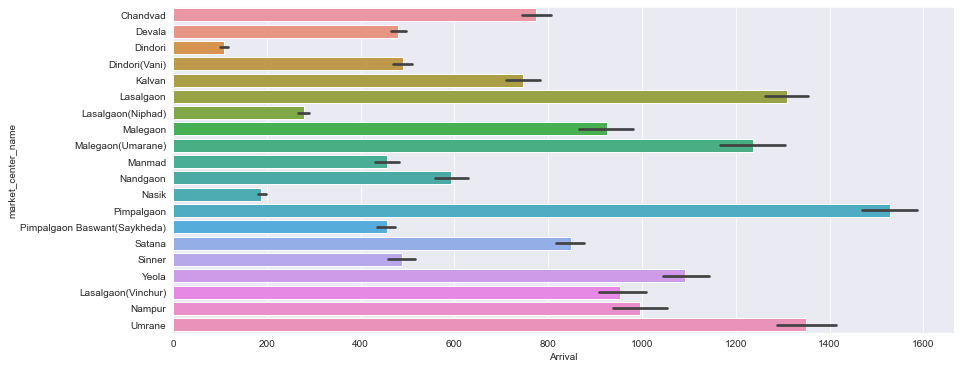

In [35]:
plt.figure(figsize=(14, 6))
sns.barplot(df['Arrival'],df['market_center_name'])

More onions arrived in Pimpalgaon.

In [37]:
df_Pivot = pd.pivot_table(df, values = "Arrival", columns = "year", index = "week")
df_Pivot

year,2017,2018,2019,2020,2021
week,,,,,
1,1539.081395,757.666667,422.899160,553.547170,428.946429
2,1553.389610,896.111111,424.821138,620.236842,744.379310
3,1677.442308,762.047619,402.646154,601.691176,900.795082
4,1709.976744,830.467742,644.011628,805.373134,803.655556
5,1915.500000,963.184615,482.222222,890.637500,524.231707
6,1983.197183,697.256410,977.389610,844.243590,414.958333
7,1716.726027,777.454545,942.800000,742.864865,314.229730
8,1556.657895,692.670588,1292.877193,987.919355,433.104348
9,1220.406593,558.034884,1150.390625,1146.845070,668.613139


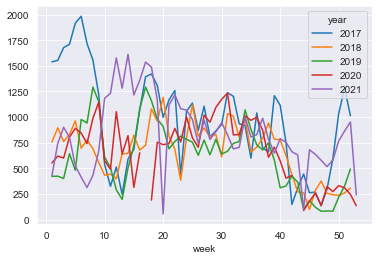

In [38]:
df_Pivot.plot()
plt.show()

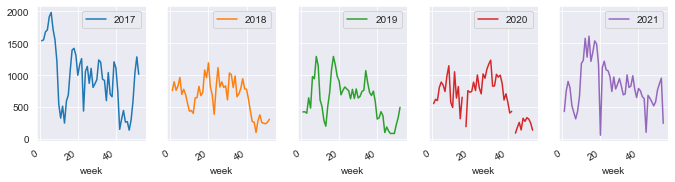

In [39]:
df_Pivot.plot(subplots = True, figsize=(16, 16), layout=(5, 7), sharey=True)
plt.show()

<AxesSubplot:xlabel='market_center_name', ylabel='Arrival'>

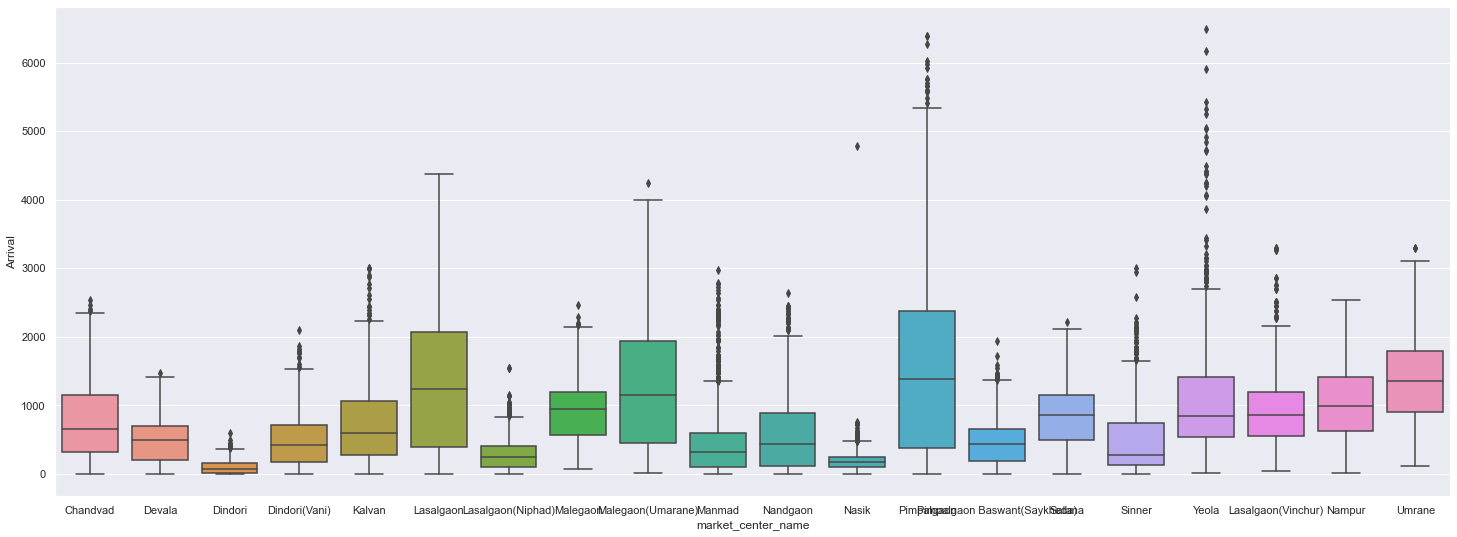

In [41]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,9)})
sns.boxplot(x = 'market_center_name', y = 'Arrival',data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MODAL', ylabel='market_center_name'>

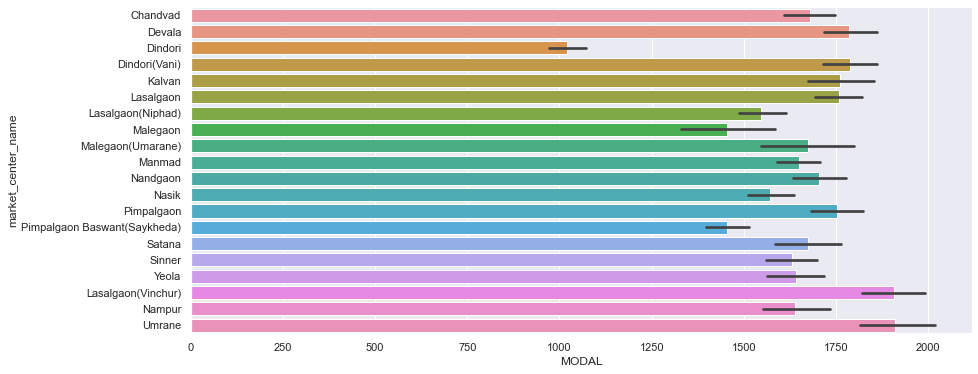

In [42]:
plt.figure(figsize=(14, 6))
sns.barplot(df['MODAL'],df['market_center_name'])

In [43]:
df_Pivot = pd.pivot_table(df, values = "MODAL", columns = "year", index = "week")
df_Pivot

year,2017,2018,2019,2020,2021
week,,,,,
1,655.244186,2641.148148,1404.689076,3716.792453,2271.767857
2,554.870130,2815.518519,388.398374,3418.710526,2440.241379
3,564.057692,2709.444444,396.000000,3018.014706,2495.278689
4,526.348837,2635.419355,378.325581,3318.686567,2383.077778
5,481.430556,1567.569231,343.808081,2370.550000,3105.853659
6,455.084507,1825.641026,358.740260,1694.141026,3352.125000
7,452.616438,1618.272727,355.662500,1806.040541,3569.824324
8,486.789474,1486.835294,376.350877,1829.064516,2899.226087
9,519.252747,986.337209,383.640625,1727.647887,2060.773723


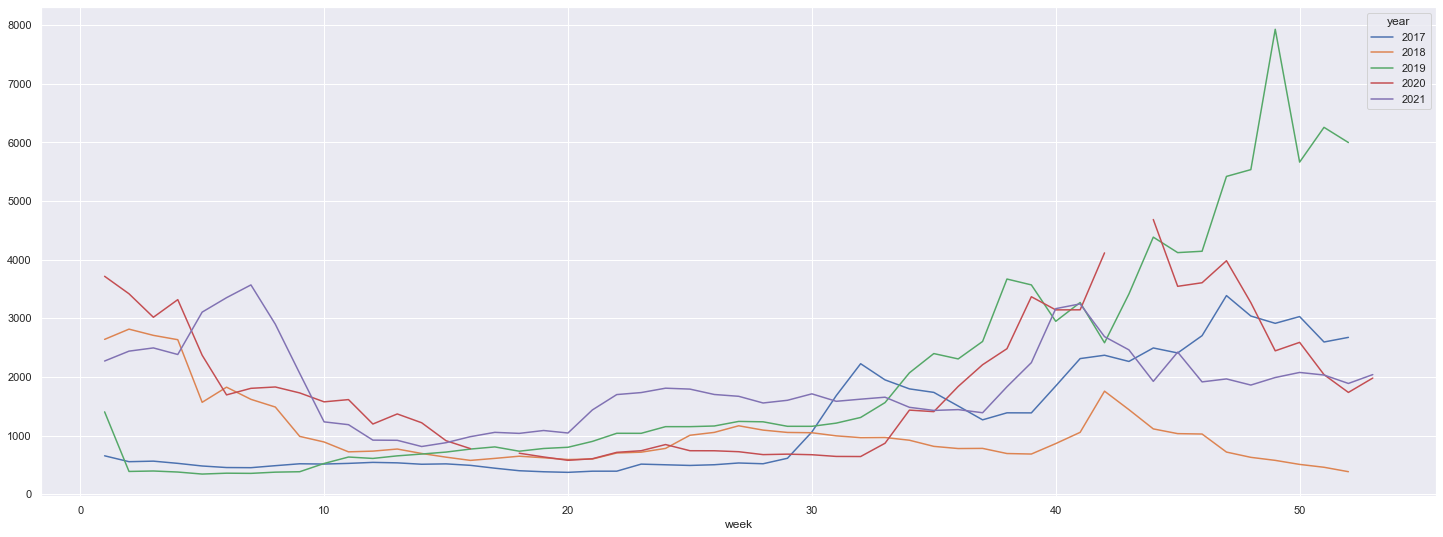

In [44]:
df_Pivot.plot()
plt.show()

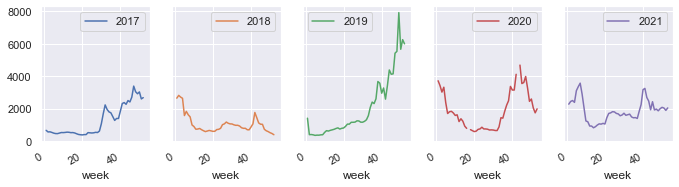

In [45]:
df_Pivot.plot(subplots = True, figsize=(16, 16), layout=(5, 7), sharey=True)
plt.show()

<AxesSubplot:xlabel='market_center_name', ylabel='MODAL'>

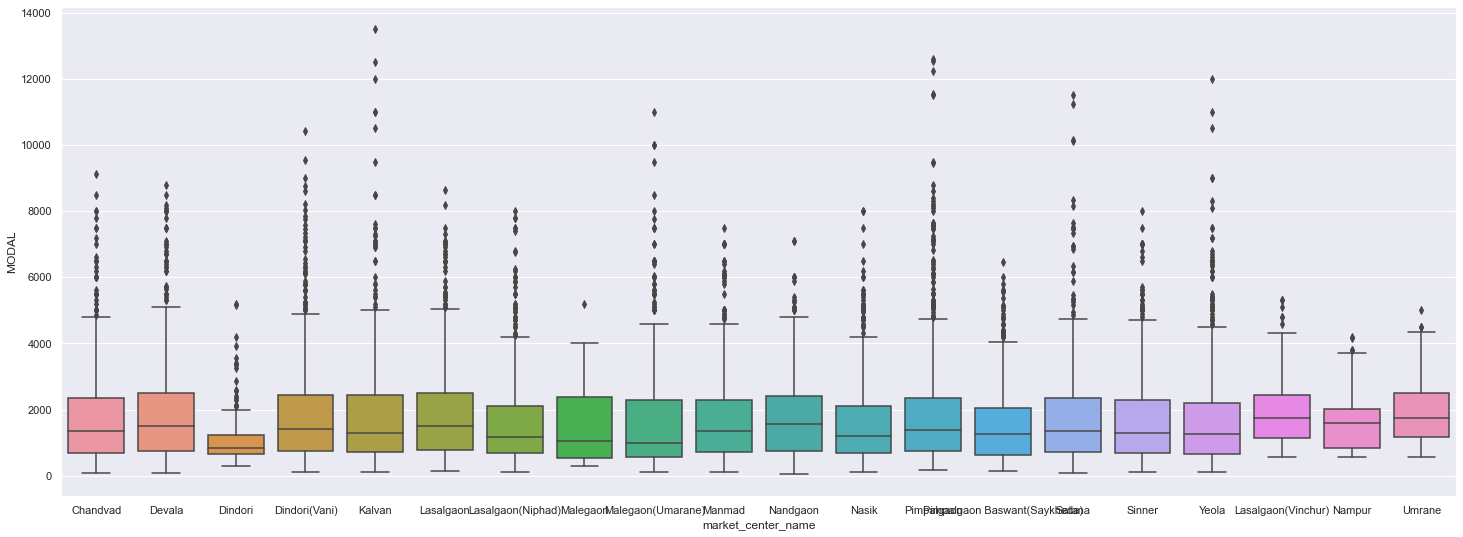

In [46]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,9)})
sns.boxplot(x = 'market_center_name', y = 'MODAL',data=df)